Loss = 0.66611636
Loss = 0.70945823
Loss = 0.67000353
Loss = 0.7590078
Loss = 0.52219635


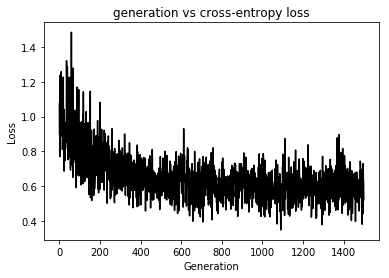

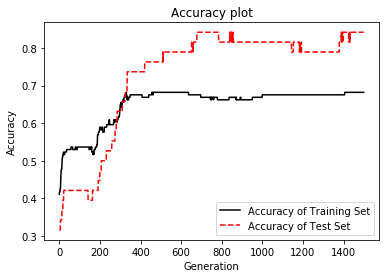

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from tensorflow.python.framework import ops
import os.path
import csv

ops.reset_default_graph()

# Creating graph

sess = tf.Session()

# making sure dataset value is pointing to csv file

dataset = 'dataset.csv'

# Reading the dataset by row

data = []
with open(dataset, newline='') as file:
    csv_reader = csv.reader(file)
    birth_header = next(csv_reader)
    for row in csv_reader:
        if row!=" ":
            data.append(row)

# converting strings to numbers to access later

data = [[float(x) for x in row] for row in data]

# taking out target variable

y_vals = np.array([x[0] for x in data])

# Pull out predictor variables (not id, not target, and not birthweight) which are independant

x_vals = np.array([x[1:8] for x in data])

# set for reproducible results to randomize the test and train datasets

seed = 108
np.random.seed(seed)
tf.set_random_seed(seed)

# Splitting dataset 

train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_train = x_vals[train_indices]
x_test = x_vals[test_indices]
y_train = y_vals[train_indices]
y_test = y_vals[test_indices]


# feature scaling by Normalize by column 

def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

# declaring x_train to train and y_train to train

x_train = np.nan_to_num(normalize_cols(x_train))
x_test = np.nan_to_num(normalize_cols(x_test))

# Declare batch size

batch_size = 25

# Now Initilize placeholders

x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# creating linear regression variables

A = tf.Variable(tf.random_normal(shape=[7, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# giving model opeeration

model_output = tf.add(tf.matmul(x_data, A), b)

# getting loss function by declaring it

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

# Declare optimizer

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# Variables initialization

init = tf.global_variables_initializer()
sess.run(init)

# Actual Prediiction

prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

# Actual Training loop

loss_vec = []
train_acc = []
test_acc = []

try:
    for i in range(1500):
        rand_index = np.random.choice(len(x_train), size=batch_size)
        rand_x = x_train[rand_index]
        rand_y = np.transpose([y_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_train, y_target: np.transpose([y_train])})
        train_acc.append(temp_acc_train)
        temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_test, y_target: np.transpose([y_test])})
        test_acc.append(temp_acc_test)
        if (i + 1) % 300 == 0:
            print('Loss = ' + str(temp_loss))
except ValueError as e:
    print(e)

# Displaying the performance of the model

# Plotting loss over time

plt.plot(loss_vec, 'k-')
plt.title('generation vs cross-entropy loss')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

# Plot train and test accuracy

plt.plot(train_acc, 'k-', label='Accuracy of Training Set')
plt.plot(test_acc, 'r--', label='Accuracy of Test Set')
plt.title('Accuracy plot')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## 